# Police Activity in New Orleans

In [1]:
# Exploring the Stanford Open Policing Project dataset and analyze the impact of gender on police behavior using Pandas.
# Dataset from: https://openpolicing.stanford.edu/data/
# Analysis based on DataCamp course
# City Analyzed: New Orleans

In [4]:
# PACKAGE IMPORT
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# READ DATASET
dataset = pd.read_csv('la_new_orleans_2020_04_01.csv')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
# DATAFRAME INSPECTION
display(dataset.head())
# COUNTING THE NUMBER OF MISSING VALUES
display(dataset.isnull().sum())
# EXAMINING THE SHAPE OF THE DATAFRAME
dataset.shape

,raw_row_number,date,time,location,lat,lng,district,zone,subject_age,subject_race,...,search_person,search_vehicle,search_basis,reason_for_stop,vehicle_color,vehicle_make,vehicle_model,vehicle_year,raw_actions_taken,raw_subject_race
0,1,2010-01-01,01:11:00,NaN,NaN,NaN,6,E,26.0,black,...,False,False,NaN,TRAFFIC VIOLATION,BLACK,DODGE,CARAVAN,2005.0,NaN,BLACK
1,9087,2010-01-01,01:29:00,NaN,NaN,NaN,7,C,37.0,black,...,False,False,NaN,TRAFFIC VIOLATION,BLUE,NISSAN,MURANO,2005.0,NaN,BLACK
2,9086,2010-01-01,01:29:00,NaN,NaN,NaN,7,C,37.0,black,...,False,False,NaN,TRAFFIC VIOLATION,BLUE,NISSAN,MURANO,2005.0,NaN,BLACK
3,267,2010-01-01,14:00:00,NaN,NaN,NaN,7,I,96.0,black,...,False,False,NaN,TRAFFIC VIOLATION,GRAY,JEEP,GRAND CHEROKEE,2003.0,NaN,BLACK
4,2,2010-01-01,02:06:00,NaN,NaN,NaN,5,D,17.0,black,...,False,False,NaN,CALL FOR SERVICE,NaN,NaN,NaN,NaN,NaN,BLACK


raw_row_number             0
date                       4
time                       0
location               95986
lat                   251684
lng                   251684
district                   0
zone                       0
subject_age            12786
subject_race           11730
subject_sex            11730
officer_assignment       123
type                  149907
arrest_made                0
citation_issued            0
warning_issued             0
outcome               176487
contraband_found      436301
contraband_drugs      436301
contraband_weapons    436301
frisk_performed            0
search_conducted           0
search_person              0
search_vehicle             0
search_basis          436301
reason_for_stop            0
vehicle_color         239138
vehicle_make          235765
vehicle_model         252982
vehicle_year          240388
raw_actions_taken     122455
raw_subject_race       11730
dtype: int64

(512092, 32)

In [10]:
# SELECT RELEVANT COLUMNS
columns = ['date','time','location','subject_race','subject_sex','arrest_made', 'outcome',
           'frisk_performed', 'search_conducted', 'reason_for_stop',
           'contraband_drugs']

# DATAFRAME COLUMNS UPDATE
dataset = dataset[columns]

# CHECK THE MISSING VALUES AGAIN
display(dataset.isnull().sum())

date                     4
time                     0
location             95986
subject_race         11730
subject_sex          11730
arrest_made              0
outcome             176487
frisk_performed          0
search_conducted         0
reason_for_stop          0
contraband_drugs    436301
dtype: int64

In [11]:
# DROP ALL ROWS THAT ARE MISSING SUBJECT_SEX
dataset.dropna(subset=['subject_sex'], inplace=True)
# FILL MISSING VALUES WITH FALSE
dataset.contraband_drugs.fillna(False, inplace=True)

# CONCATENATE A STOP DATE AND TIME
combined = dataset.date.str.cat(dataset.time, sep=' ')
dataset['stop_datetime'] = pd.to_datetime(combined)


# CHANGE THE DATA TYPE TO CORRECT ONES
dataset['arrest_made'] = dataset.arrest_made.astype('bool')
dataset['frisk_performed'] = dataset.frisk_performed.astype('bool')
dataset['contraband_drugs'] = dataset.contraband_drugs.astype('bool')

# SET STOP_DATETIME AS THE DATAFRAME INDEX
dataset.set_index('stop_datetime', inplace=True)

In [14]:
# COMPARING THE VIOLATIONS BY GENDER
# COUNT THE UNIQUE VALUES IN VIOLATION
print(dataset.reason_for_stop.value_counts(normalize=True))

TRAFFIC VIOLATION         0.565281
CALL FOR SERVICE          0.140103
SUSPECT PERSON            0.126928
CRIMINAL VIOLATION        0.059965
OTHER                     0.048377
CITIZEN CONTACT           0.031593
SUSPECT VEHICLE           0.011090
FLAGGED DOWN              0.008870
JUVENILE VIOLATION        0.006219
PRESENT AT CRIME SCENE    0.001575
Name: reason_for_stop, dtype: float64


In [15]:
# CREATE DATASETS BY GENDER
female = dataset[dataset.subject_sex == 'female']
male = dataset[dataset.subject_sex == 'male']
# PRINT THE RESULTS
print(female.reason_for_stop.value_counts(normalize=True))
print(male.reason_for_stop.value_counts(normalize=True))

TRAFFIC VIOLATION         0.657800
CALL FOR SERVICE          0.149886
SUSPECT PERSON            0.063194
CRIMINAL VIOLATION        0.040915
OTHER                     0.040552
CITIZEN CONTACT           0.024860
SUSPECT VEHICLE           0.008996
FLAGGED DOWN              0.006641
JUVENILE VIOLATION        0.005799
PRESENT AT CRIME SCENE    0.001356
Name: reason_for_stop, dtype: float64
TRAFFIC VIOLATION         0.527141
SUSPECT PERSON            0.153202
CALL FOR SERVICE          0.136070
CRIMINAL VIOLATION        0.067817
OTHER                     0.051603
CITIZEN CONTACT           0.034369
SUSPECT VEHICLE           0.011953
FLAGGED DOWN              0.009788
JUVENILE VIOLATION        0.006393
PRESENT AT CRIME SCENE    0.001665
Name: reason_for_stop, dtype: float64


In [16]:
# DOES GENDER AFFECT WHO GETS A TICKET FOR SPEEDING?
female_and_speeding = dataset[(dataset.subject_sex == 'female') & (dataset.reason_for_stop == 'Speeding')]
male_and_speeding = dataset[(dataset.subject_sex == 'male') & (dataset.reason_for_stop == 'Speeding')]
# PRINT THE RESULTS
print(female.outcome.value_counts(normalize=True))
print(male.outcome.value_counts(normalize=True))

warning     0.391197
citation    0.383717
arrest      0.225086
Name: outcome, dtype: float64
warning     0.359814
citation    0.332711
arrest      0.307475
Name: outcome, dtype: float64


In [19]:
# DOES GENDER AFFECT WHOSE VEHICLE IS SEARCHED?
# CALCULATE THE SEARCH RATE BY COUNTING THE VALUES
print(dataset.search_conducted.value_counts(normalize=True))
# CALCULATE THE SEARCH RATE BY TAKING THE MEAN
print(dataset.search_conducted.mean())
# CALCULATE THE SEARCH RATE FOR FEMALE DRIVERS
print(dataset[dataset.subject_sex == 'female'].search_conducted.mean())
# CALCULATE THE SEARCH RATE FOR EACH COMBINATION OF GENDER AND VIOLATION
print(dataset.groupby(['subject_sex', 'reason_for_stop']).search_conducted.mean())

False    0.849457
True     0.150543
Name: search_conducted, dtype: float64
0.15054300686303115
0.09020389160470497
subject_sex  reason_for_stop       
female       CALL FOR SERVICE          0.174904
             CITIZEN CONTACT           0.055907
             CRIMINAL VIOLATION        0.271419
             FLAGGED DOWN              0.180412
             JUVENILE VIOLATION        0.064935
             OTHER                     0.121222
             PRESENT AT CRIME SCENE    0.262626
             SUSPECT PERSON            0.146046
             SUSPECT VEHICLE           0.121005
             TRAFFIC VIOLATION         0.052187
male         CALL FOR SERVICE          0.300643
             CITIZEN CONTACT           0.123347
             CRIMINAL VIOLATION        0.372607
             FLAGGED DOWN              0.268166
             JUVENILE VIOLATION        0.169536
             OTHER                     0.164415
             PRESENT AT CRIME SCENE    0.323729
             SUSPECT PERSON      

In [20]:
# DOES GENDER AFFECT WHO IS FRISKED DURING A SEARCH?
# TAKE THE SUM OF FRISK
dataset.frisk_performed.sum()

# CREATE A DATAFRAME OF STOPS IN WHICH A SEARCH WAS CONDUCTED
searched = dataset[dataset.search_conducted == True]
# CALCULATE THE OVERAL FRISK RATE BY TAKING THE MEAN OF FRISK
print(searched.frisk_performed.mean())
# CALCULATE THE FRISK RATE FOR EACH GENDER
print(searched.groupby('subject_sex').frisk_performed.mean())

0.7464885962350317
subject_sex
female    0.698216
male      0.756722
Name: frisk_performed, dtype: float64


In [22]:
# DOES TIME OF DAY AFFECT ARREST RATE?
# CALCULATE OVERAL ARREST RATE
print(dataset.arrest_made.mean())
# CALCULATE HOURLY ARREST RATE
print(dataset.groupby(dataset.index.hour).arrest_made.mean())
# SAVE THE RESULT HOURLY ARREST RATE
hourly_arrest_rate = dataset.groupby(dataset.index.hour).arrest_made.mean()

0.18712252329313578
stop_datetime
0.0     0.194071
1.0     0.201496
2.0     0.217244
3.0     0.224769
4.0     0.211595
5.0     0.228263
6.0     0.244163
7.0     0.131304
8.0     0.120049
9.0     0.152427
10.0    0.166873
11.0    0.169304
12.0    0.182095
13.0    0.197237
14.0    0.224503
15.0    0.172028
16.0    0.156956
17.0    0.166047
18.0    0.176540
19.0    0.180522
20.0    0.190243
21.0    0.198172
22.0    0.225801
23.0    0.209784
Name: arrest_made, dtype: float64


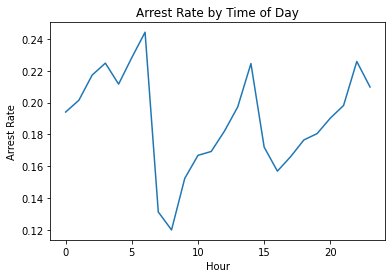

In [23]:

# CREATE A LINE PLOT OF HOURLY ARREST RATE
hourly_arrest_rate.plot()
# ADD THE XLABEL, YLABEL, AND TITLE
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')
# DISPLAY THE PLOT
plt.show()

stop_datetime
2010-12-31    0.000016
2011-12-31    0.007878
2012-12-31    0.017566
2013-12-31    0.028744
2014-12-31    0.018627
2015-12-31    0.017147
2016-12-31    0.023679
2017-12-31    0.037121
2018-12-31    0.043027
Name: contraband_drugs, dtype: float64


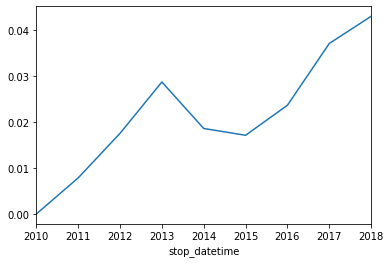

In [25]:
# ARE DRUG-RELATED STOPS ON THE RISE?
# CALCULATE THE ANNUAL RATE OF DRUG-RELATED STOPS
print(dataset.contraband_drugs.resample('A').mean())
# SAVE THE ANNUAL RATE OF DRUG-RELATED STOPS
annual_drug_rate = dataset.contraband_drugs.resample('A').mean()
# CREATE A LINE PLOT OF ANNUAL DRUG RATE
annual_drug_rate.plot()
# DISPLAY THE PLOT
plt.show()

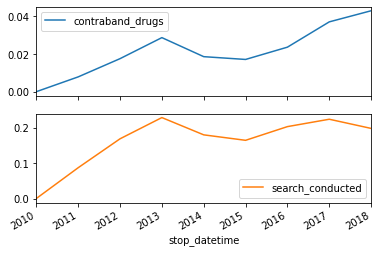

In [26]:
# DOES THE DRUG RATE INCREASES BECAUSE OF THE SEARCH INCREASING?
# CALCULATE AND SAVE THE ANNUAL SEARCH RATE
annual_search_rate = dataset.search_conducted.resample('A').mean()
# CONCATENATE ANNUAL_DRUG_RATE AND ANNUAL SEARCH RATE
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')
# CREATE SUBPLOTS FROM ANNUAL
annual.plot(subplots=True)
# DISPLAY THE SUBPLOTS
plt.show()

In [27]:
# WHAT VIOLATIONS ARE CAUGHT BY GENDER?
# CREATE A FREQUENCY TABLE OF GENDER AND VIOLATIONS
display(pd.crosstab(dataset.subject_sex, dataset.reason_for_stop))

reason_for_stop,CALL FOR SERVICE,CITIZEN CONTACT,CRIMINAL VIOLATION,FLAGGED DOWN,JUVENILE VIOLATION,OTHER,PRESENT AT CRIME SCENE,SUSPECT PERSON,SUSPECT VEHICLE,TRAFFIC VIOLATION
subject_sex,,,,,,,,,,
female,21892,3631,5976,970,847,5923,198,9230,1314,96077
male,48210,12177,24028,3468,2265,18283,590,54280,4235,186768


[]

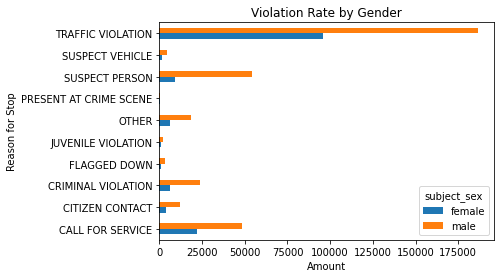

In [28]:
# SAVE THE FREQUENCY TABLE AS VIOLATION BY GENDER
violation_by_gender = pd.crosstab(dataset.reason_for_stop, dataset.subject_sex)
# CREATE A BAR PLOT OF VIOLATION BY GENDER
violation_by_gender.plot(kind='barh')
plt.xlabel('Amount')
plt.ylabel('Reason for Stop')
plt.title('Violation Rate by Gender')
# DISPLAY THE PLOT
plt.plot()